# Explore here

In [63]:
import pandas as pd

# Load Titanic dataset from URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [64]:
import os
#(We can first store the dataset as a flat CSV file, which is easy to share and load.)

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/AB_NYC_2019.csv', index=False)

print(f'Dataset stored as {output_dir}/AB_NYC_2019.csv')

Dataset stored as data/raw/AB_NYC_2019.csv


In [65]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/airbnb.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('AirBnB_Data', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'Air Bnb' table.")

Dataset stored in SQLite database as 'Air Bnb' table.


In [66]:
# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM AirBnB_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [67]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [68]:
df['price'].value_counts()

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
930        1
920        1
4100       1
3512       1
1494       1
Name: count, Length: 674, dtype: int64

In [69]:
df['minimum_nights'].value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
275        1
182        1
114        1
85         1
36         1
Name: count, Length: 109, dtype: int64

In [70]:
df['availability_365'].value_counts()  

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

In [71]:
df['reviews_per_month'].value_counts()  

reviews_per_month
0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
7.85       1
7.29       1
10.37      1
9.21       1
10.54      1
Name: count, Length: 937, dtype: int64

In [72]:
df.shape    

(48895, 16)

In [73]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [74]:
# Check the remaining columns after dropping
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

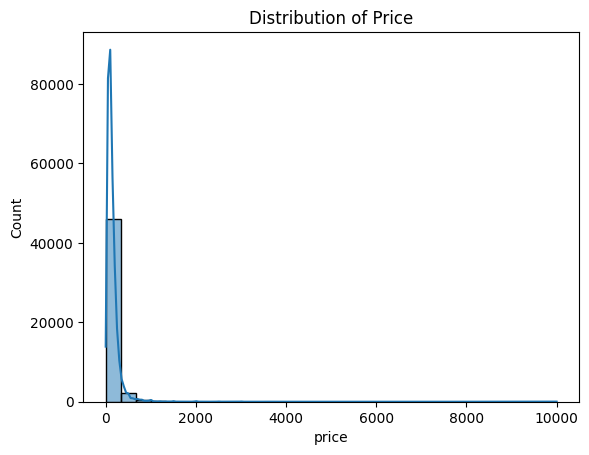

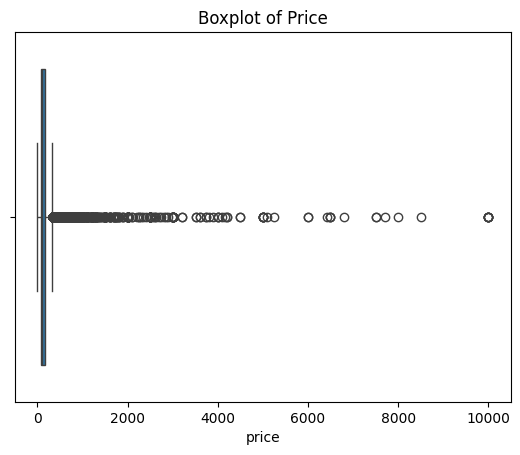

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'Age' column
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

# Boxplot for Age
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

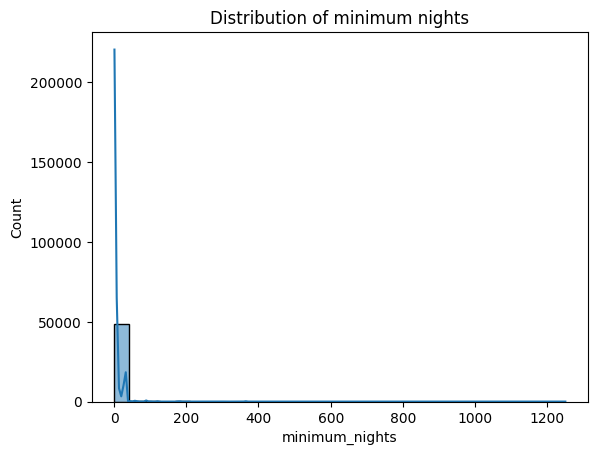

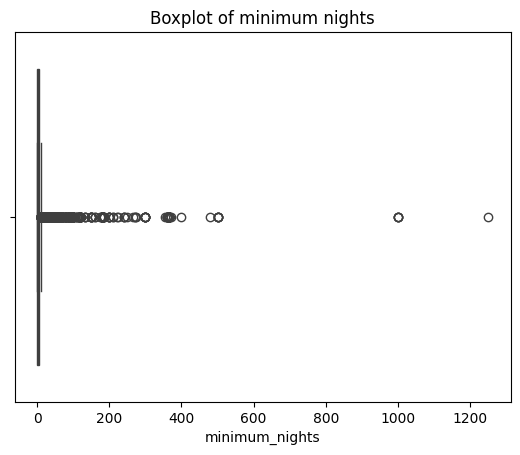

In [76]:
# Plot a histogram for the 'minimum_nights' column
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of minimum nights')
plt.show()

# Boxplot for minimum_nights
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of minimum nights')
plt.show()

In [77]:
df['price'].value_counts(normalize=True)


price
100     0.041947
150     0.041865
50      0.031373
60      0.029819
200     0.028653
          ...   
930     0.000020
920     0.000020
4100    0.000020
3512    0.000020
1494    0.000020
Name: proportion, Length: 674, dtype: float64

In [78]:
df.duplicated().sum()   

np.int64(0)

In [79]:
df['price'].nunique()

674

In [80]:
df['price'].value_counts()

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
930        1
920        1
4100       1
3512       1
1494       1
Name: count, Length: 674, dtype: int64

In [81]:
df = df.drop(["id", "name", "host_name",], axis=1)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [82]:
df = df.drop(["latitude", "longitude", 'calculated_host_listings_count'], axis=1)

In [83]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000
last_review,10052,20.558339
reviews_per_month,10052,20.558339
availability_365,0,0.000000


In [84]:
# Define the threshold (e.g., 30%)
threshold = 20

# Drop columns where the percentage of missing values exceeds the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns from the dataframe
df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")

Following columns were dropped: ['last_review', 'reviews_per_month']


In [85]:
# Check the remaining columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   host_id              48895 non-null  int64 
 1   neighbourhood_group  48895 non-null  object
 2   neighbourhood        48895 non-null  object
 3   room_type            48895 non-null  object
 4   price                48895 non-null  int64 
 5   minimum_nights       48895 non-null  int64 
 6   number_of_reviews    48895 non-null  int64 
 7   availability_365     48895 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.0+ MB


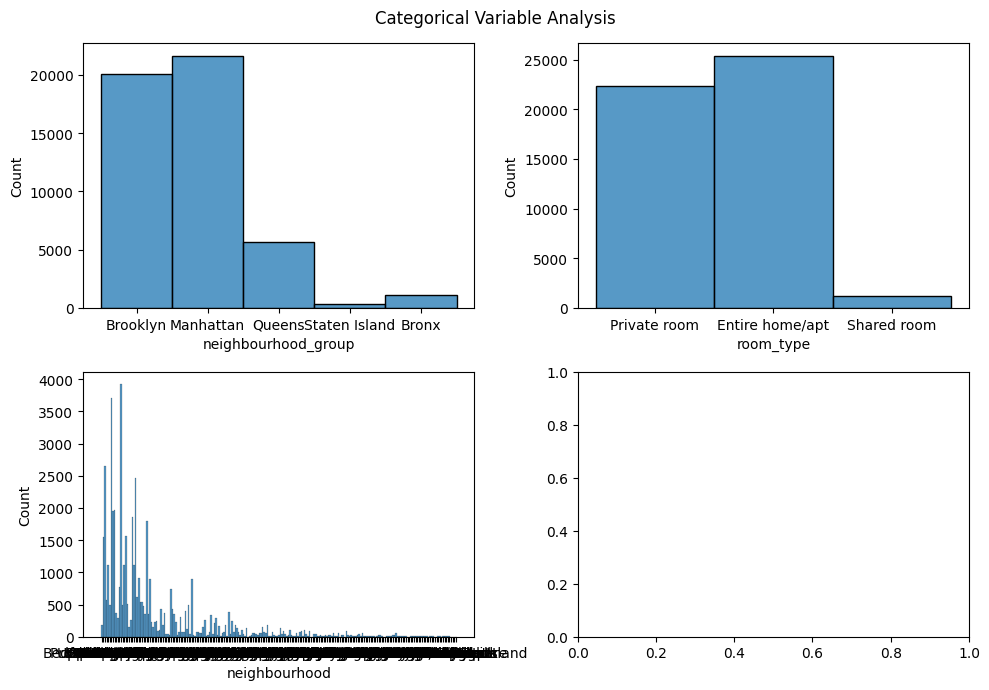

In [86]:
categorical_features = ['neighbourhood_group', 'neighbourhood', 'number_of_reviews']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[1, 0], data = df, x = "neighbourhood")
sns.histplot(ax = axis[0, 1], data = df, x = "room_type")
#sns.histplot(ax = axis[1, 1], data = df, x = "availability_365")

plt.suptitle("Categorical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

In [87]:
df["neighbourhood"].nunique()

221

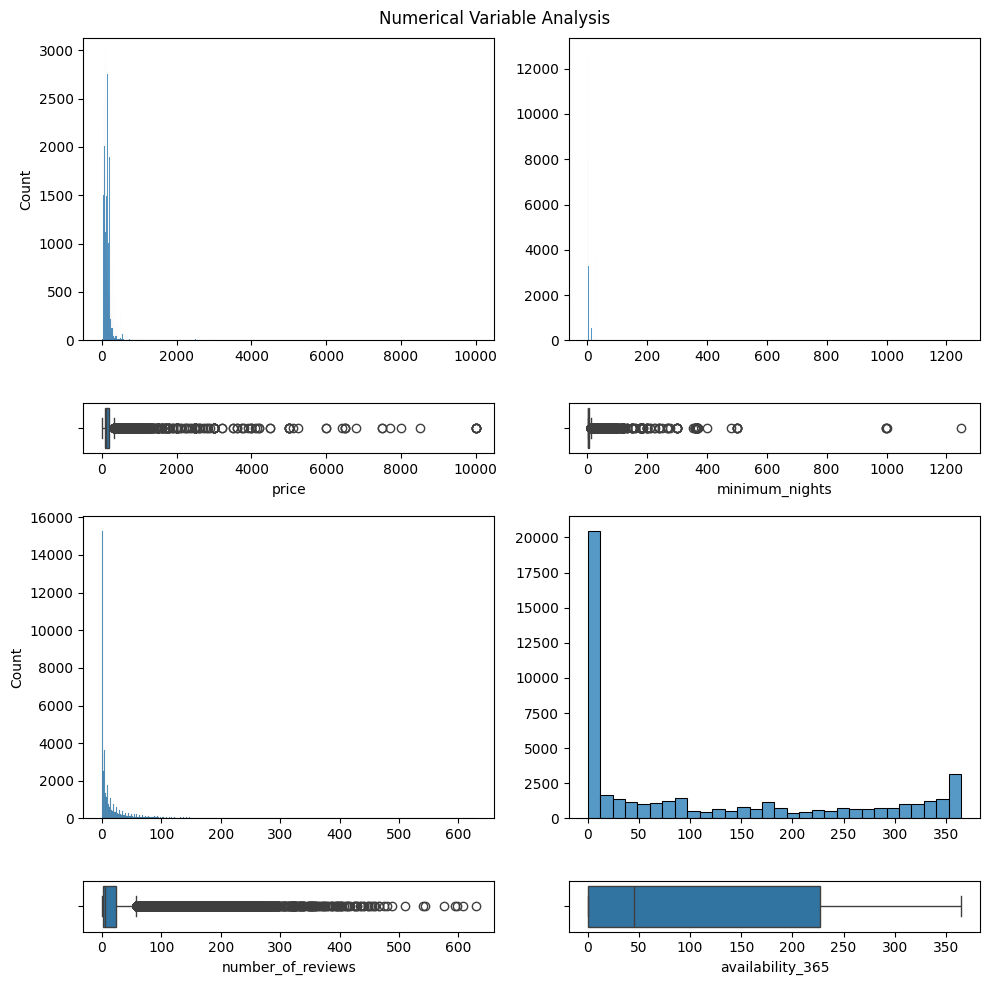

In [88]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")
sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "availability_365")

plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

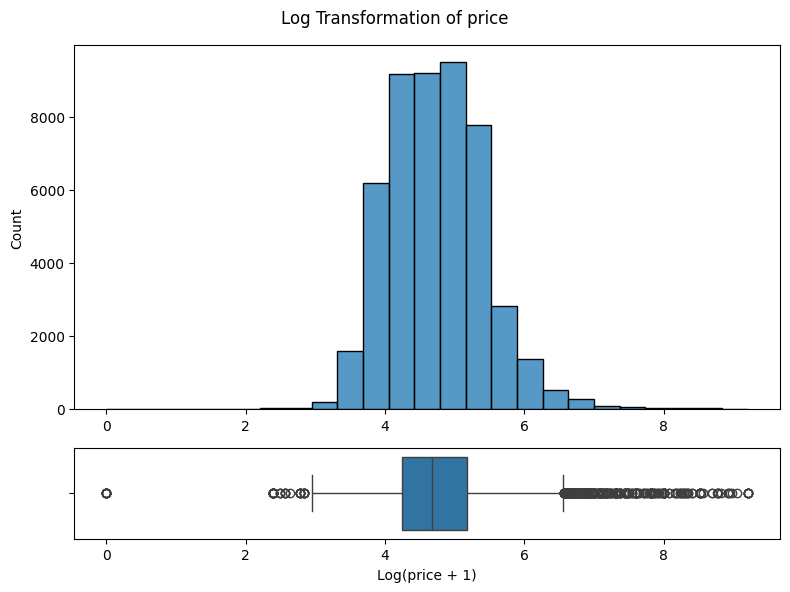

In [89]:
import numpy as np

# Create a figure with 2 subplots: one for the histogram and one for the boxplot
fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

# Apply log transformation to 'Fare' using log1p (log(x + 1)) to avoid log(0)
# Plot the log-transformed 'Fare' histogram and boxplot
sns.histplot(np.log1p(df['price']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['price']), ax=axis[1])
axis[1].set_xlabel('Log(price + 1)')

# Adjust layout and show the plot
plt.suptitle("Log Transformation of price")
plt.tight_layout()
plt.show()

In [90]:
# Our numerical features
numerical_features

['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

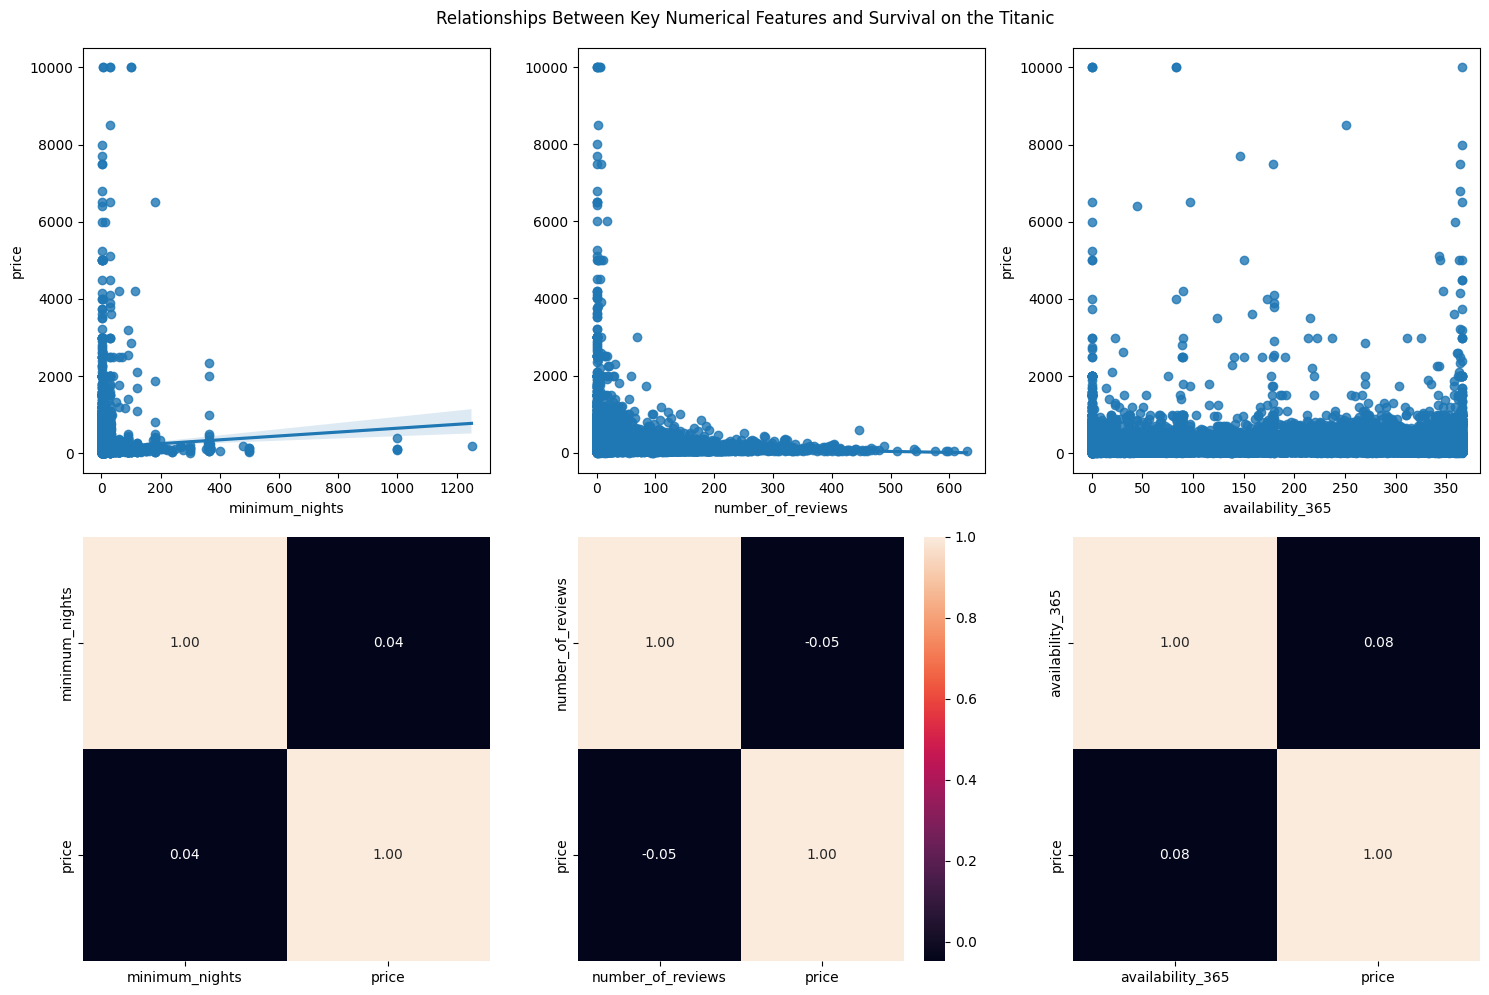

In [91]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(df[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = df, x = "availability_365", y = "price")
sns.heatmap(df[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar=False)

#sns.regplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
#sns.heatmap(df[["calculated_host_listings_count", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

plt.suptitle("Relationships Between Key Numerical Features and Survival on the Titanic", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()

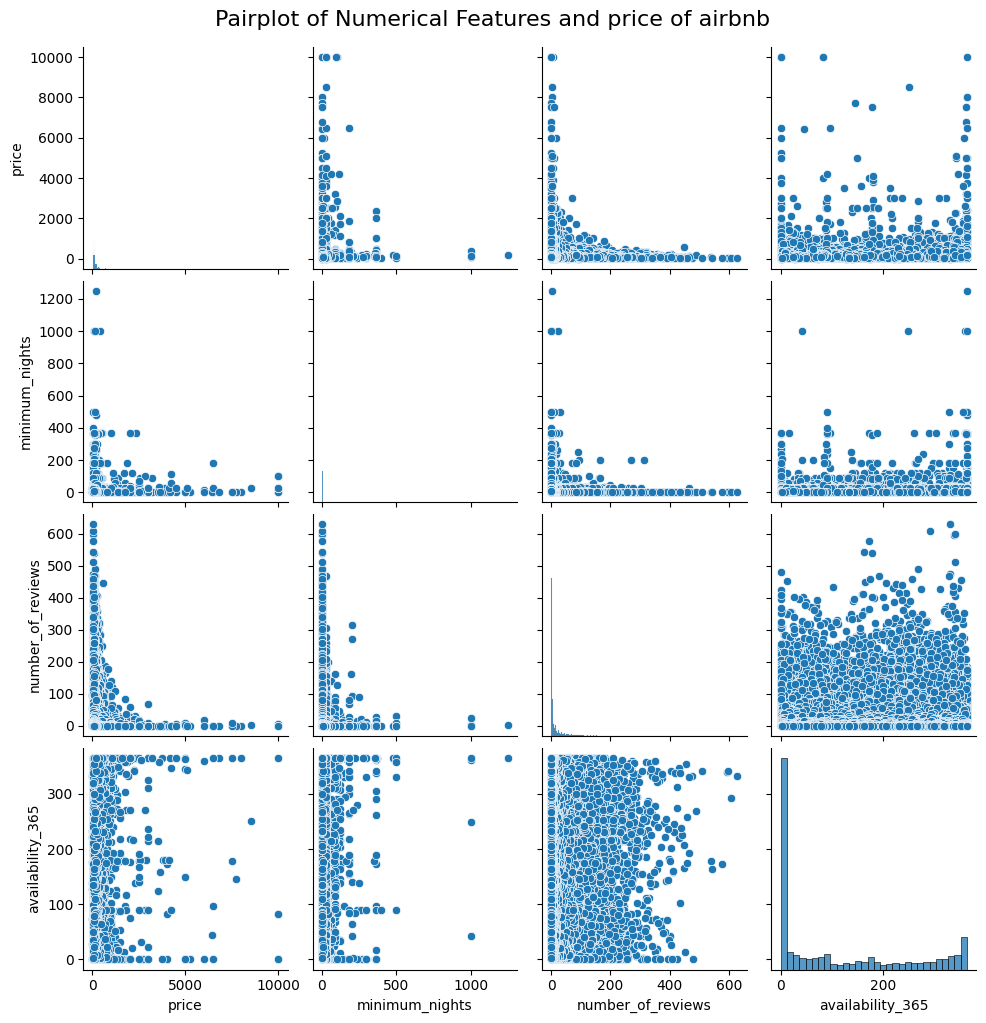

In [92]:
sns.pairplot(data = df[numerical_features])
plt.suptitle("Pairplot of Numerical Features and price of airbnb", y=1.02, fontsize=16)
plt.show()

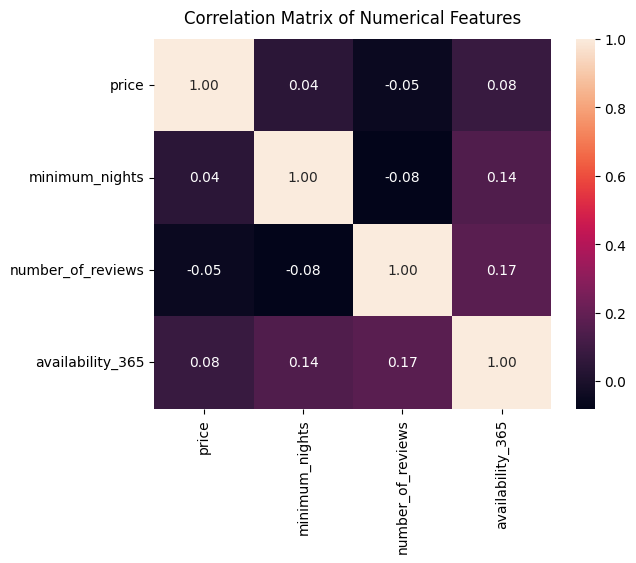

In [93]:
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()

In [94]:
# Our categorical features
categorical_features

['neighbourhood_group', 'neighbourhood', 'number_of_reviews']

/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


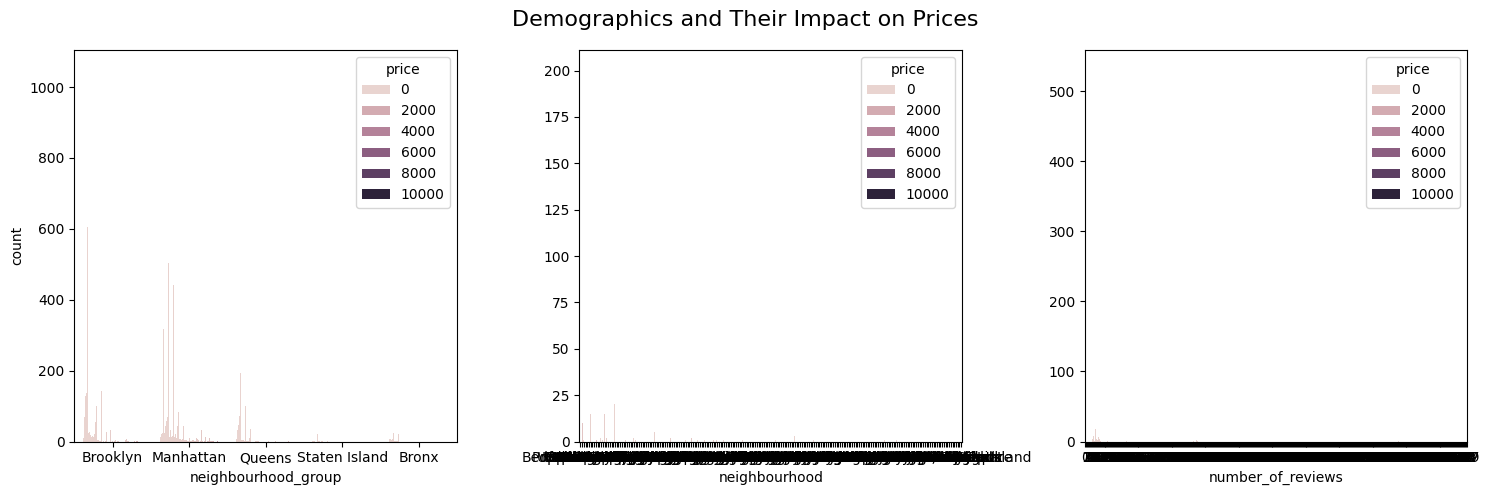

In [95]:
fig, axis = plt.subplots(1,3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[1], data = df, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[2], data = df, x = "number_of_reviews", hue = "price").set(ylabel = None)

fig.suptitle("Demographics and Their Impact on Prices", fontsize=16)
plt.tight_layout()

plt.show()

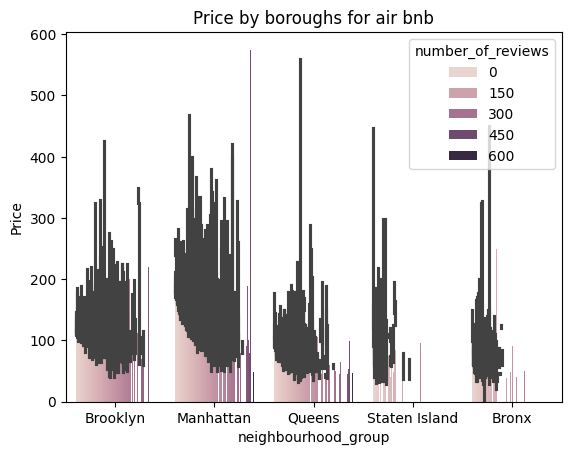

In [96]:
sns.barplot(data = df, x = "neighbourhood_group", y = "price", hue = "number_of_reviews")
plt.ylabel("Price")
plt.title("Price by boroughs for air bnb")
plt.show()

In [127]:
# pd.factorize() can factorize categorical features to make them numeric (e.g. {"male": 0, "female": 1})
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df["number_of_reviews_n"] = pd.factorize(df["number_of_reviews"])[0]
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]

In [98]:
# Inspect the original (categorical) feature and the factorized (numeric) feature
df[["neighbourhood", "neighbourhood_n"]]

,neighbourhood,neighbourhood_n
0,Kensington,0
1,Midtown,1
2,Harlem,2
3,Clinton Hill,3
4,East Harlem,4
...,...,...
48890,Bedford-Stuyvesant,6
48891,Bushwick,21
48892,Harlem,2
48893,Hell's Kitchen,7


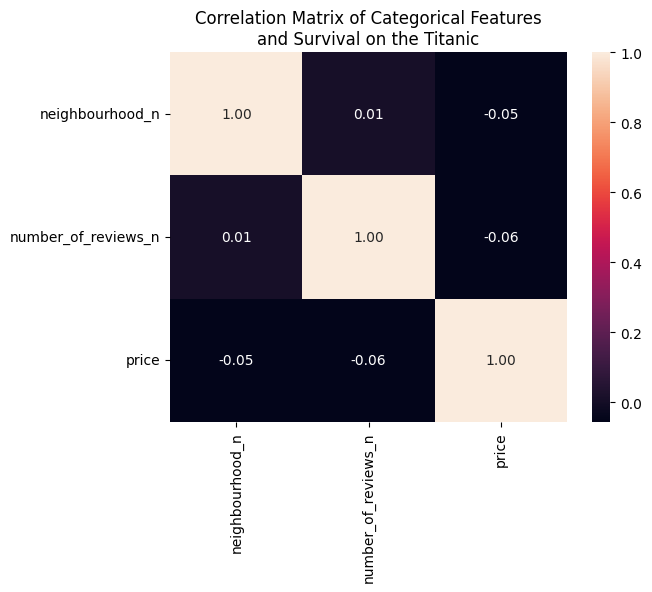

In [99]:
categorical_features = ['neighbourhood_n', 'number_of_reviews_n']

sns.heatmap(df[categorical_features + ['price']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Categorical Features\nand Survival on the Titanic")
plt.show()

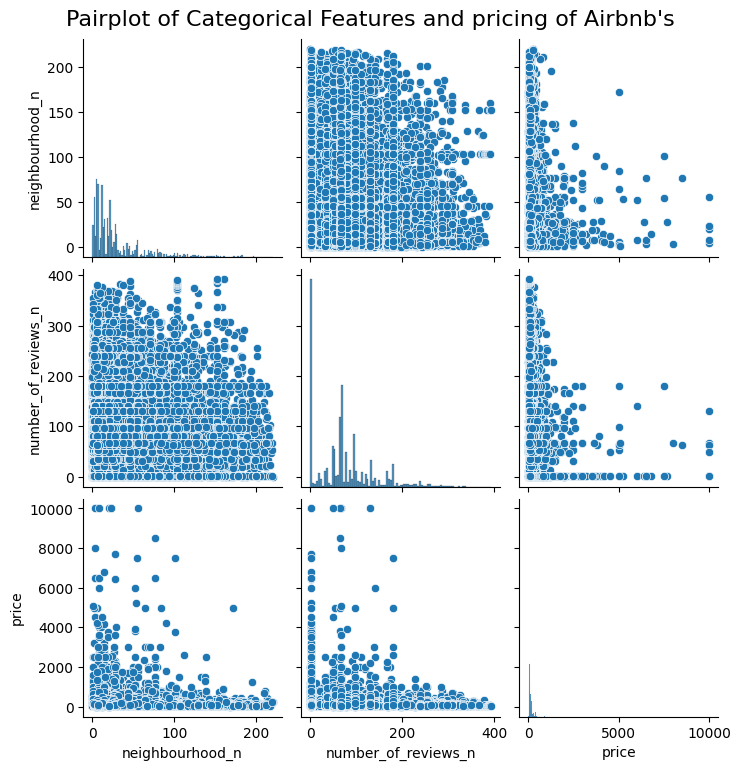

In [100]:
# Warning! Pairplots can be slow!
# And not too useful for categorical data
sns.pairplot(data = df[categorical_features + ['price']])
plt.suptitle("Pairplot of Categorical Features and pricing of Airbnb's", y=1.02, fontsize=16)
plt.show()

In [101]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
Categorical features: ['neighbourhood_n', 'number_of_reviews_n']


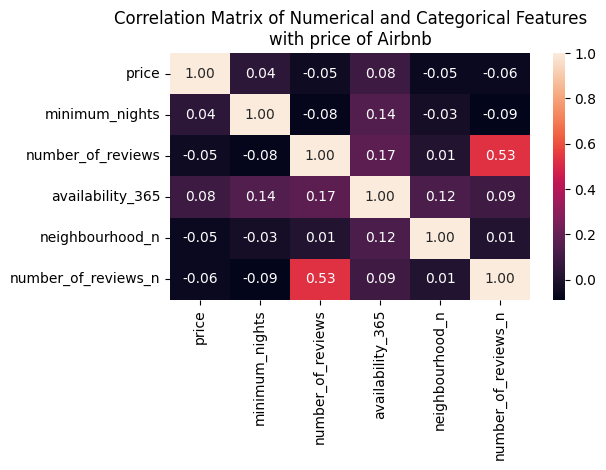

In [102]:
sns.heatmap(df[numerical_features + categorical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical and Categorical Features\nwith price of Airbnb")
plt.tight_layout()

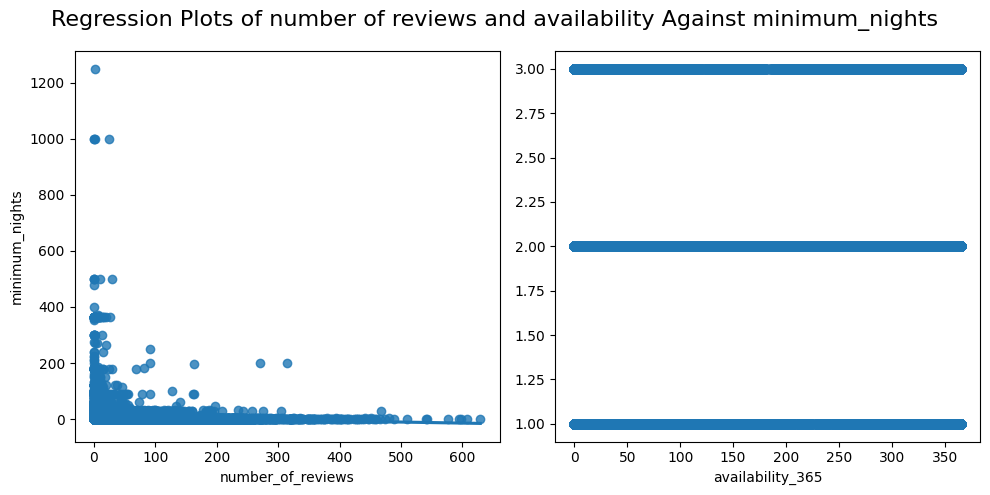

In [103]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = df, x = "number_of_reviews", y = "minimum_nights")
sns.regplot(ax = axis[1], data = df, x = "availability_365", y = "minimum_nights").set(ylabel = None, ylim = (0.9, 3.1))

fig.suptitle("Regression Plots of number of reviews and availability Against minimum_nights", fontsize=16)
plt.tight_layout()

plt.show()

In [104]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]
    

,host_id,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_n,number_of_reviews_n
mean,6.762001e+07,152.720687,7.029962,23.274466,112.781327,29.888782,74.405133
min,2.438000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,0.000000,7.500000,20.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,227.000000,37.000000,98.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,365.000000,220.000000,393.000000


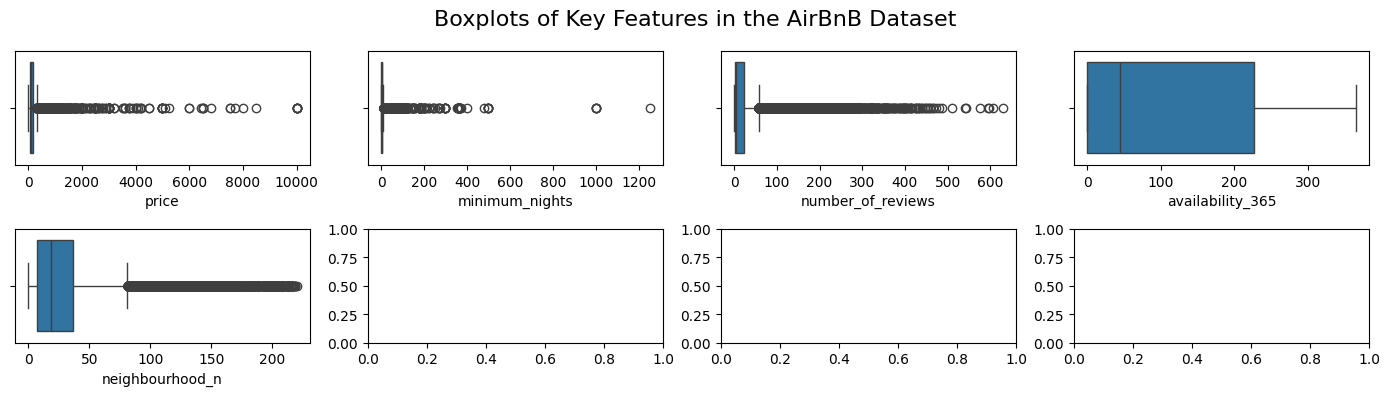

In [105]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[0, 1], data = df, x = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[0, 3], data = df, x = "availability_365")
sns.boxplot(ax = axis[1, 0], data = df, x = "neighbourhood_n")


fig.suptitle("Boxplots of Key Features in the AirBnB Dataset", fontsize=16)
plt.tight_layout()

plt.show()

In [106]:
price_Q25_from_df = df['price'].quantile(0.25)
price_Q75_from_df = df['price'].quantile(0.75)

print(f"25% quantile of `Price` (using the entire dataset): {price_Q25_from_df}")
print(f"75% quantile of `Price` (using the entire dataset): {price_Q75_from_df}")

25% quantile of `Price` (using the entire dataset): 69.0
75% quantile of `Price` (using the entire dataset): 175.0


In [107]:
price_IQR_from_df = price_Q75_from_df - price_Q25_from_df
print(f"IQR of `price` (using the entire dataset): {price_Q75_from_df} - {price_Q25_from_df} = {price_IQR_from_df}")

IQR of `price` (using the entire dataset): 175.0 - 69.0 = 106.0


In [108]:
price_lower_limit_from_df = price_Q25_from_df - 1.5 * price_IQR_from_df
price_upper_limit_from_df = price_Q75_from_df + 1.5 * price_IQR_from_df

print(f"The lower limit for `price` outliers (using the entire dataset): {price_lower_limit_from_df}")
print(f"The upper limit for `price` outliers (using the entire dataset): {price_upper_limit_from_df}")

The lower limit for `price` outliers (using the entire dataset): -90.0
The upper limit for `price` outliers (using the entire dataset): 334.0


In [109]:
df[df['price'] > 6000]


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_n,number_of_reviews_n
3774,11598359,Brooklyn,Clinton Hill,Entire home/apt,6500,1,0,0,3,2
4377,1177497,Brooklyn,Clinton Hill,Entire home/apt,8000,1,1,365,3,68
6530,1235070,Manhattan,East Harlem,Entire home/apt,9999,5,1,0,4,68
9151,20582832,Queens,Astoria,Private room,10000,100,2,0,56,64
12342,3906464,Manhattan,Lower East Side,Private room,9999,99,6,83,23,131
17692,5143901,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0,20,49
29238,72390391,Manhattan,Upper West Side,Entire home/apt,10000,30,0,83,8,2
29662,156158778,Manhattan,Upper East Side,Entire home/apt,7703,1,0,146,28,2
29664,156158778,Manhattan,Upper East Side,Entire home/apt,6419,1,0,45,28,2
30268,18128455,Manhattan,Tribeca,Entire home/apt,8500,30,2,251,77,64


In [128]:
X = df[['neighbourhood_group_n', 'neighbourhood_n', 'room_type_n', 'minimum_nights', 'number_of_reviews', 'availability_365']] # A dataframe (double brackets)


X

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,availability_365
0,0,0,0,1,9,365
1,1,1,1,1,45,355
2,1,2,0,3,0,365
3,0,3,1,1,270,194
4,1,4,1,10,9,0
...,...,...,...,...,...,...
48890,0,6,0,2,0,9
48891,0,21,0,4,0,36
48892,1,2,1,10,0,27
48893,1,7,2,1,0,2


In [111]:
y = df['price'] # A series (single brackets)

y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [113]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 48895
Dimensions of X_train: (39116, 6)
Dimensions of y_train: (39116,)
Proportion of train set: 39116 / 48895 = 0.80 = 80%


In [114]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 48895
Dimensions of X_test: (9779, 6)
Dimensions of y_test: (9779,)
Proportion of test set: 9779 / 48895 = 0.20 = 20%


In [115]:
y_train.describe()

count    39116.000000
mean       152.106785
std        235.310281
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [118]:
# Initialize the SimpleImputer to replace 0s with the mean
imputer = SimpleImputer(missing_values=0, strategy='mean')
# Impute y_train
y_train = pd.Series(imputer.fit_transform(y_train.to_frame()).ravel(), index=y_train.index)
# Impute y_test using the same imputer (fitted on y_train)
y_test = pd.Series(imputer.transform(y_test.to_frame()).ravel(), index=y_test.index)
# Display the results
print("y_train after imputation:")
print(y_train)
print("\ny_test after imputation:")
print(y_test)

y_train after imputation:
17035    110.0
45114    950.0
16932    119.0
35886    100.0
39445    500.0
         ...  
34701     89.0
35283    250.0
39218    150.0
12944    100.0
16059    169.0
Length: 39116, dtype: float64

y_test after imputation:
29036    115.0
5834     178.0
46558    300.0
10317    100.0
15123     51.0
         ...  
16213     37.0
11215     80.0
41831     70.0
45971    428.0
6027      79.0
Length: 9779, dtype: float64


In [ ]:
X_train['minimum_nights'].describe()

count    39116.000000
mean         6.946876
std         19.366078
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1000.000000
Name: minimum_nights, dtype: float64

In [119]:
count_20 = (df['minimum_nights']>20).sum()
count_20

np.int64(5330)

In [120]:
# Calculate the mean of 'minimum_nights' in X_train
mean_train = X_train['minimum_nights'].mean()
# Replace values > 20 with the mean in X_train
X_train.loc[X_train['minimum_nights'] > 20, 'minimum_nights'] = mean_train
# Replace values > 20 with the same mean in X_test
X_test.loc[X_test['minimum_nights'] > 20, 'minimum_nights'] = mean_train
# Display the results
print("X_train after imputation:")
print(X_train)
print("\nX_test after imputation:")
print(X_test)

X_train after imputation:
      neighbourhood_group        neighbourhood        room_type  \
17035           Manhattan               Harlem  Entire home/apt   
45114           Manhattan      Upper West Side  Entire home/apt   
16932           Manhattan  Morningside Heights     Private room   
35886              Queens     Ditmars Steinway     Private room   
39445           Manhattan      Upper West Side  Entire home/apt   
...                   ...                  ...              ...   
34701              Queens            Ridgewood     Private room   
35283            Brooklyn        Crown Heights     Private room   
39218           Manhattan      Lower East Side     Private room   
12944            Brooklyn         Williamsburg     Private room   
16059           Manhattan      Upper East Side  Entire home/apt   

       minimum_nights  number_of_reviews  availability_365  
17035        4.000000                125                44  
45114        7.082882                  0       

/tmp/ipykernel_743/2041025003.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.08288168524389' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['minimum_nights'] > 20, 'minimum_nights'] = mean_train
/tmp/ipykernel_743/2041025003.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.08288168524389' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[X_test['minimum_nights'] > 20, 'minimum_nights'] = mean_train


In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [130]:
scaler.fit(X_train)


StandardScaler()

In [131]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)

SelectKBest(k=5)

In [133]:
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])

In [134]:
# Inspecting X_train_sel (with the five most important features)
X_train_sel

,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,availability_365
0,-0.257109,0.798521,-0.149998,-0.456501,-0.857916
1,-0.055499,2.646088,-0.296893,2.131430,-0.857916
2,-0.516322,-1.049045,-0.296893,-0.231464,0.568798
3,-0.516322,-1.049045,-0.247928,-0.501509,-0.136970
4,-0.689130,0.798521,-0.198963,-0.433998,-0.660604
...,...,...,...,...,...
39111,0.088508,0.798521,-0.101032,-0.524013,-0.607482
39112,-0.055499,0.798521,1.172063,-0.501509,1.707133
39113,-0.458719,-1.049045,-0.247928,-0.141449,-0.774438
39114,0.002104,-1.049045,-0.198963,-0.231464,0.462553


In [135]:
dict(zip(X_train.columns,selection_model.scores_))


{'neighbourhood_group_n': np.float64(1.1428029057134028),
 'neighbourhood_n': np.float64(3.3323899392854757),
 'room_type_n': np.float64(31.97204363668001),
 'minimum_nights': np.float64(2.7934569610985776),
 'number_of_reviews': np.float64(2.05800473315081),
 'availability_365': np.float64(3.5468409085387202)}

In [137]:
# Define the path to store the dataset
output_dir = 'data/processed'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
X_train_sel.to_csv(f'{output_dir}/AirBnB_clean_train.csv', index=False)
print(f'Dataset stored as {output_dir}/AirBnB_clean_train.csv')

X_test_sel.to_csv(f'{output_dir}/AirBnB_clean_test.csv', index=False)
print(f'Dataset stored as {output_dir}/AirBnB_clean_test.csv')

Dataset stored as data/processed/AirBnB_clean_train.csv
Dataset stored as data/processed/AirBnB_clean_test.csv
